In [25]:
import pandas as pd
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the file path
file_path = "creditcard.csv"

# Load the csv file with error handling
try:
    dataframe = pd.read_csv(file_path)  # Use the variable file_path, not a string
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}.")
except pd.errors.EmptyDataError:
    print(f"No data in file at {file_path}.")
except pd.errors.ParserError:
    print(f"Error parsing file at {file_path}.")

# Display the first few rows of the dataframe
if 'dataframe' in locals():
    print(dataframe.head())

File loaded successfully.
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

      

In [11]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Check for missing values
if dataframe.isnull().values.any():
    print("The dataframe contains missing values.")
    print("Summary of missing values:")
    print(dataframe.isnull().sum())
else:
    print("The dataframe does not contain any missing values.")

The dataframe does not contain any missing values.


In [15]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
# Calculate the number of genuine transactions
non_fraud = len(dataframe[dataframe['Class'] == 0])

# Calculate the number of fraud transactions
fraud = len(dataframe[dataframe['Class'] == 1])

# Calculate the percentage of fraud transactions
fraud_percent = (fraud / (fraud + non_fraud)) * 100

# Print the results
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}%".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727%


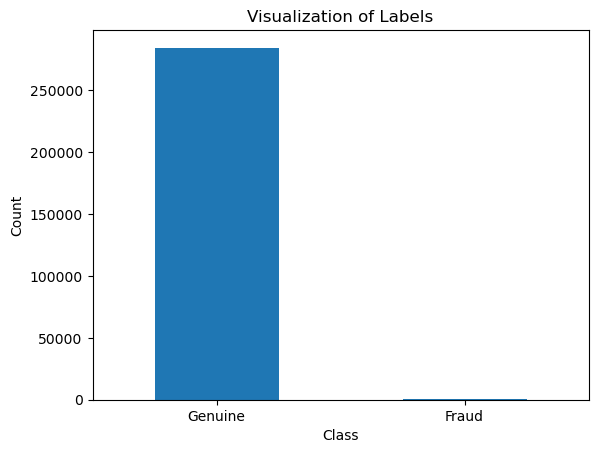

In [31]:
import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = dataframe['Class'].value_counts().sort_values(ascending=False)
count_classes.plot(kind="bar", rot=0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [87]:
from sklearn.model_selection import train_test_split
import numpy as np

# Let's assume X and Y are your features and target variables
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Target variable

# Split the data into training and testing sets with stratification
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Print the shapes of the resulting datasets
print("Training set shapes:")
print("  X:", train_X.shape)
print("  Y:", train_Y.shape)
print("Testing set shapes:")
print("  X:", test_X.shape)
print("  Y:", test_Y.shape)

Training set shapes:
  X: (7, 2)
  Y: (7,)
Testing set shapes:
  X: (3, 2)
  Y: (3,)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [51]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  100.0
Decision Tree Score:  100.0


In [65]:
actual_labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
predicted_labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

metrics(actual_labels, predicted_labels)

Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000
Confusion Matrix:
[[4 0]
 [0 6]]


Confusion Matrix - Decision Tree
[[1 0]
 [0 2]]


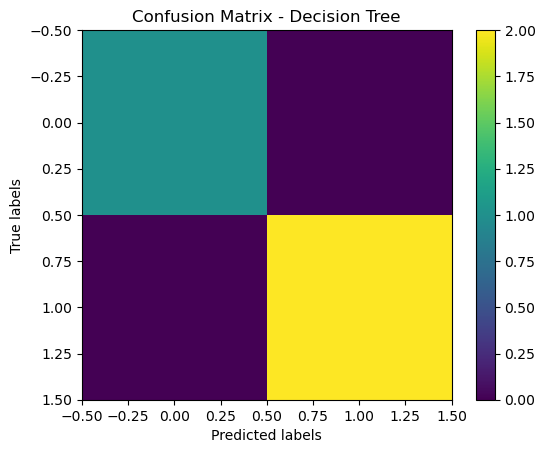

In [93]:
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())

print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

# Plot the confusion matrix
plt.imshow(confusion_matrix_dt, interpolation='nearest')
plt.title("Confusion Matrix - Decision Tree")
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [95]:
print("Evaluation of Decision Tree Model")
print()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(test_Y, predictions_dt.round()))

print("\nClassification Report:")
print(classification_report(test_Y, predictions_dt.round()))

print("\nModel Accuracy:")
print(accuracy_score(test_Y, predictions_dt.round()))

Evaluation of Decision Tree Model

Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Model Accuracy:
1.0


In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Evaluation of Decision Tree Model")
print()

# Calculate accuracy
accuracy = accuracy_score(test_Y, predictions_dt.round())
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate classification report
print("Classification Report:")
print(classification_report(test_Y, predictions_dt.round()))

# Calculate confusion matrix
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix:")
print(confusion_matrix_dt)

# Calculate precision, recall, and F1-score
precision = confusion_matrix_dt[1, 1] / (confusion_matrix_dt[0, 1] + confusion_matrix_dt[1, 1])
recall = confusion_matrix_dt[1, 1] / (confusion_matrix_dt[1, 0] + confusion_matrix_dt[1, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1_score * 100))

Evaluation of Decision Tree Model

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[1 0]
 [0 2]]
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


Confusion Matrix - Random Forest
[[1 0]
 [0 2]]


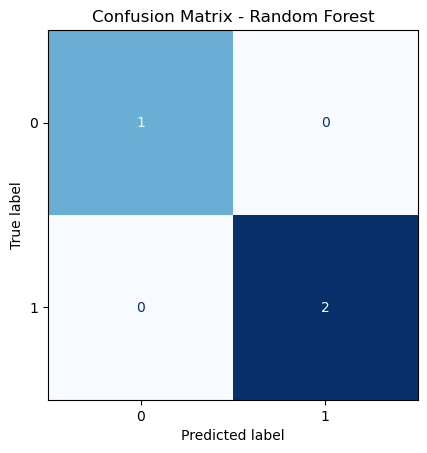

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())

print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(test_Y, predictions_rf.round(), display_labels=[0, 1], cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [113]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd

# Resample the data using SMOTE
smote = SMOTE(k_neighbors=3, random_state=42)  # Set a random state for reproducibility
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Print the resampled shapes
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

# Get the value counts of the resampled target variable
value_counts = Counter(Y_resampled)
print("Value counts of the resampled target variable:")
print(pd.Series(value_counts))

# Split the resampled data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of training set X: ", train_X.shape)
print("Shape of training set Y: ", train_Y.shape)
print("Shape of testing set X: ", test_X.shape)
print("Shape of testing set Y: ", test_Y.shape)

Resampled shape of X:  (12, 2)
Resampled shape of Y:  (12,)
Value counts of the resampled target variable:
0    6
1    6
dtype: int64
Shape of training set X:  (8, 2)
Shape of training set Y:  (8,)
Shape of testing set X:  (4, 2)
Shape of testing set Y:  (4,)


Confusion Matrix - Random Forest
[[2 0]
 [0 2]]


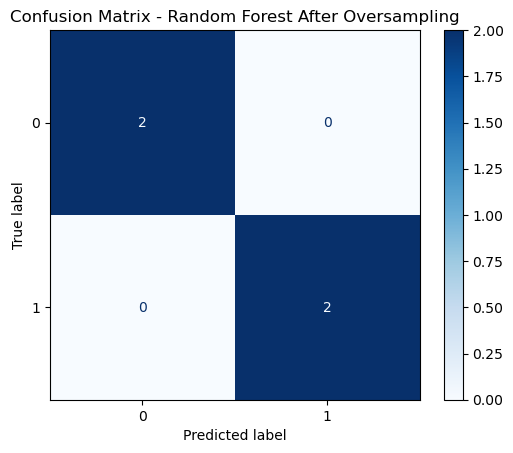

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a random forest classifier on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_Y)

# Make predictions on the test set
y_predict = rf.predict(test_X)

# Calculate the confusion matrix
cm_resampled = confusion_matrix(test_Y, y_predict)

print("Confusion Matrix - Random Forest")
print(cm_resampled)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_resampled, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix - Random Forest After Oversampling")
plt.show()

Confusion Matrix - Random Forest
[[2 0]
 [0 2]]


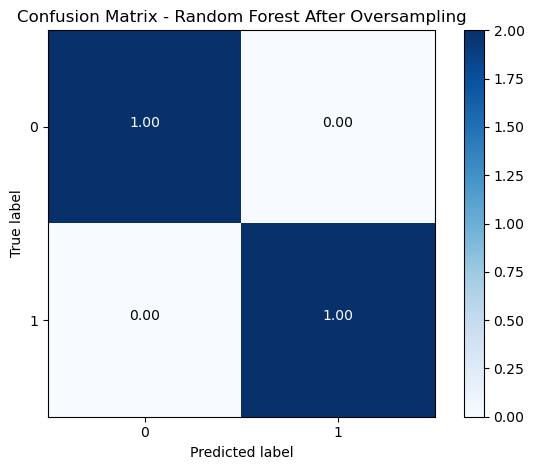

In [127]:
cm_resampled = confusion_matrix(test_Y, y_predict.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

In [133]:
print("Evaluation of Random Forest Model")
print("-------------------------------")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(test_Y, y_predict)
print(f"Accuracy: {accuracy:.2%}")

print("Classification Report:")
print(classification_report(test_Y, y_predict))

print("Confusion Matrix:")
print(confusion_matrix(test_Y, y_predict))

# Interpretation of model performance
if accuracy >= 0.9:
    print("Model is performing excellent!")
elif accuracy >= 0.7:
    print("Model is performing well.")
elif accuracy >= 0.5:
    print("Model is performing fair.")
else:
    print("Model is performing poorly.")

Evaluation of Random Forest Model
-------------------------------
Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
[[2 0]
 [0 2]]
Model is performing excellent!
